In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv',encoding = 'Windows-1252')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
714,ham,He also knows about lunch menu only da. . I know,NaN,NaN,NaN
45,ham,No calls..messages..missed calls,NaN,NaN,NaN
4324,ham,Am only searching for good dual sim mobile pa.,NaN,NaN,NaN
4269,ham,Great. Hope you are using your connections fro...,NaN,NaN,NaN
4354,ham,"Sorry, I can't help you on this.",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [9]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvement
# Website
# Deploy

## DATA CLEANING

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# drop last 3 columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
# renaming the cols
df.rename(columns = {'v1': 'target', 'v2' : 'text'}, inplace = True)

In [14]:
df.sample(5)

,target,text
3002,ham,I will see in half an hour
3873,ham,No. Did you multimedia message them or e-mail?
1842,ham,"\Are you comingdown later?\"""""
3622,ham,"Damn, poor zac doesn't stand a chance"
1750,ham,Got it..mail panren paru..


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head() # spam = 1, ham = 0

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
# check for duplicated valus
df.duplicated().sum()

403

In [22]:
df = df.drop_duplicates(keep = 'first')

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(5169, 2)

## Exploratory Data Analysis


In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# ratio ot ham to spam
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

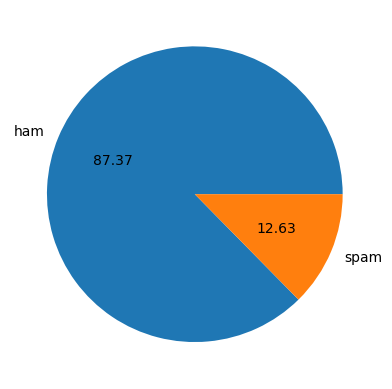

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

In [28]:
## data is imbalanced (percentage of ham is far greater than spam)

In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ratulsur/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
#calculating the length of each mssg(in terms of characters) and dumping into a new column
df['num_characters'] = df['text'].apply(len)

In [32]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
#fetching the number of words in a particular sentence and dumping them correspondingly into a new column
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [36]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# analysing spam and ham differently
# HAM MESSAGES
df[df['target'] == 0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# SPAM MESSAGES
df[df['target'] == 1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

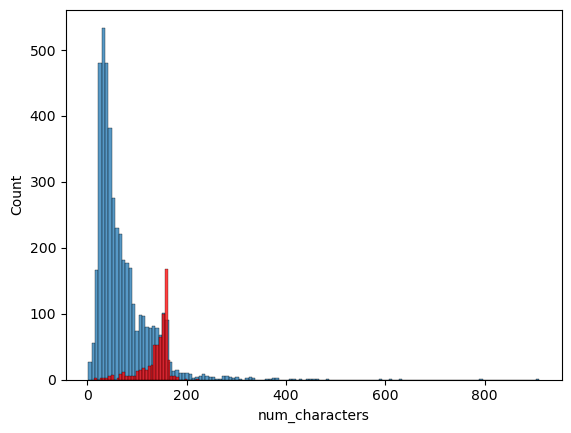

In [41]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

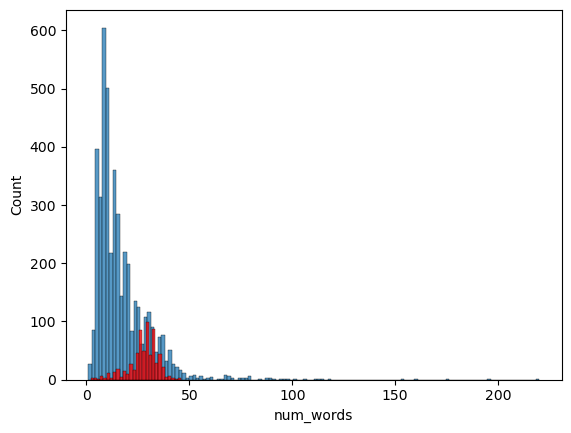

In [42]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


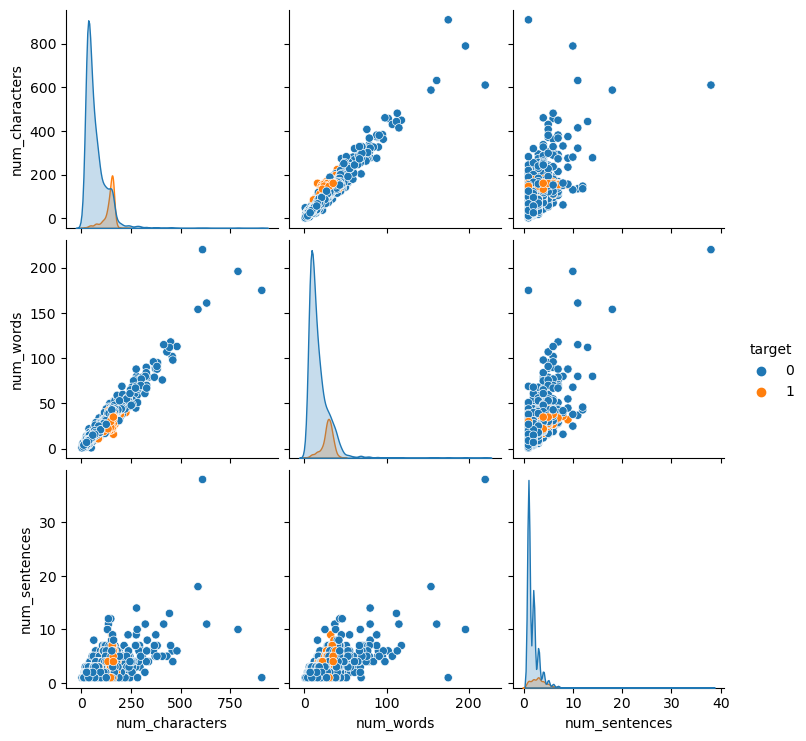

In [43]:
sns.pairplot(df, hue = 'target')

In [44]:
## in the above pairplots we can see that there are multiple outliers

In [45]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
column_to_exclude = 'text'
df_without_column_to_exclude = df.drop(column_to_exclude, axis = 1)

In [48]:
df_without_column_to_exclude.head(5)

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [49]:
df_without_column_to_exclude.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

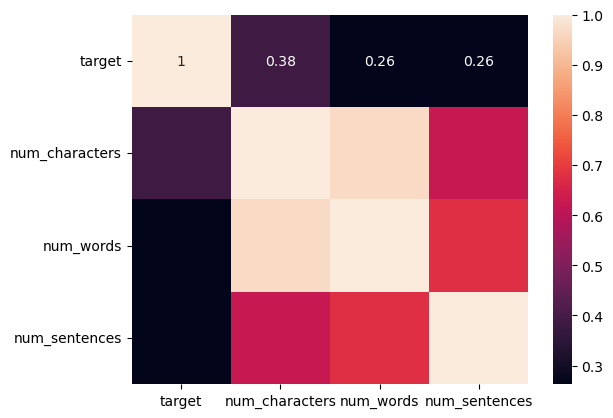

In [51]:
sns.heatmap(df_without_column_to_exclude.corr(), annot = True)

## Data Preprocessing

##### Lower-Case
##### Tokenization
##### Removing Special Characters
##### Removing StopWords and Punctuations
##### Stemming

In [52]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ratulsur/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
 

  ## removing special characters from the text by appending only alphanumeric text in a new list
  
  y = []

  for i in text :
    if i.isalnum():
      y.append(i)

  text = y[:] ##cloning y because you cannot directly copy it like text = y
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
    
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y) ## joining the list y and returning it as a string

In [54]:
transform_text("I Loved the Yt lectures on Machine Learning. How about YOU?")

'love yt lectur machin learn'

In [55]:
df['transformed_text'] = df['text'].apply(transform_text)

In [56]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##### generating word cloud of both spam and ham messageses. word cloud will show us which words are most often used in these messages

In [61]:
!pip3 install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 1.0 MB/s eta 0:00:00a 0:00:01m


In [63]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [64]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

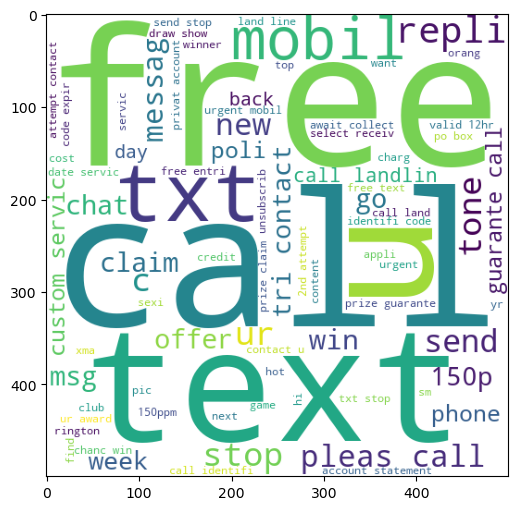

In [65]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [66]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

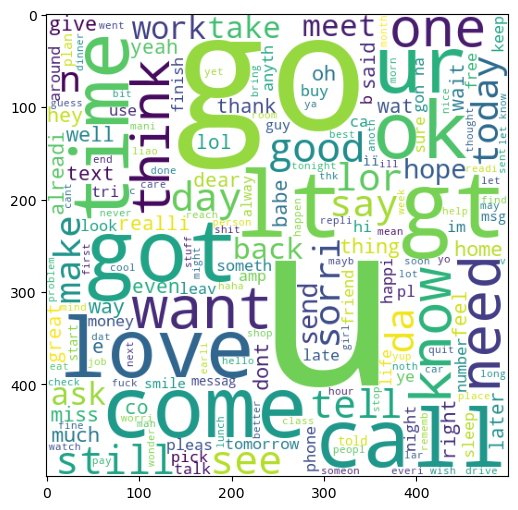

In [67]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

##### Showing top 30 messages of each category

In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##### SPAM CORPUS

In [69]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [70]:
len(spam_corpus)

9939

In [71]:
from collections import Counter
common_items = Counter(spam_corpus).most_common(30)

##creating a df from the most common items(words)
df_common_spam = pd.DataFrame(common_items, columns=['Item', 'Count'])
df_common_spam.head(5)

,Item,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


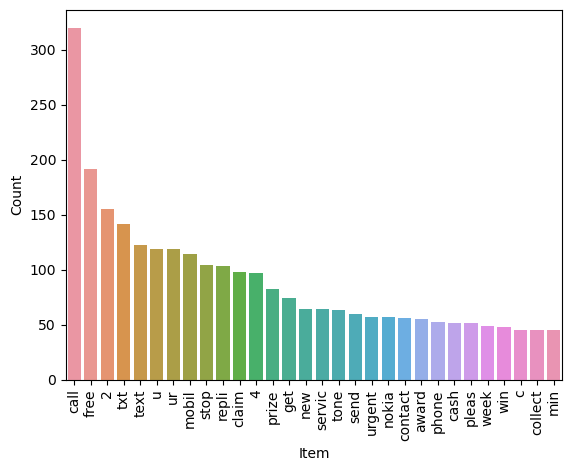

In [72]:
sns.barplot(x='Item', y='Count', data=df_common_spam)
plt.xticks(rotation = 'vertical') #rotating the barplot for better viewing
plt.show()

##### HAM CORPUS

In [73]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [74]:
len(ham_corpus)

35404

In [75]:
from collections import Counter
common_items = Counter(ham_corpus).most_common(30)

##creating a df from the most common items(words)
df_common_ham = pd.DataFrame(common_items, columns=['Item', 'Count'])
df_common_ham.head(5)

,Item,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


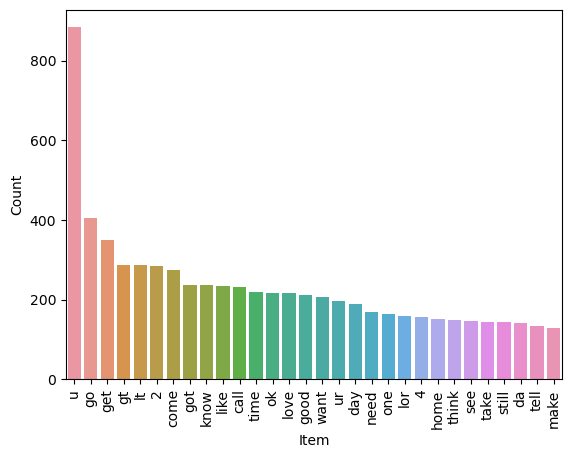

In [76]:
sns.barplot(x='Item', y='Count', data=df_common_ham)
plt.xticks(rotation = 'vertical') #rotating the barplot for better viewing
plt.show()

## Model Evaluation

In [77]:
# NAIVE BAYES (There is a general consensus that for texual data NB works very good)

In [196]:
# TEXT VECOTRIZATION using BOW, TFIDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [197]:
x = cv.fit_transform(df['transformed_text']).toarray() ## the resultant X would be a sparse matrix hence .toarray() is used to make it a dense array
x2 = tfidf.fit_transform(df['transformed_text']).toarray() ## another x array for using tfidf

In [198]:
#x.shape
x2.shape

(5169, 3000)

In [199]:
y = df['target'].values

In [200]:
y.shape

(5169,)

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)
x2_train, x2_test, y_train, y_test = train_test_split(x2,y, test_size = 0.2, random_state = 2)

In [203]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [204]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

##### Scores using BOW

In [205]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [206]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [207]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


##### Scores using TFIDF

In [208]:
gnb.fit(x2_train, y_train)
y_pred4 = gnb.predict(x2_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(precision_score(y_test, y_pred4))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [209]:
mnb.fit(x2_train, y_train)
y_pred5 = mnb.predict(x2_test)
print(accuracy_score(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))
print(precision_score(y_test, y_pred5))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [210]:
bnb.fit(x_train, y_train)
y_pred6 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred6))
print(precision_score(y_test, y_pred6))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [211]:
## as this data is imbalanced therefore precision_score matters more than accuracy, therefore we are going with  MNB (TF-IDF)

##### Using other models and comparing them

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [213]:
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
rfc = RandomForestClassifier(n_estimators = 50, random_state  = 2)

In [214]:
# creating an dictionary with names of models as the keys and models as the values
models = {
    'LR' : lrc,
    'KNN' : knc,
    'NB' : mnb,
    'DT' : dtc, 
    'RF' : rfc,
}

In [215]:
def model_trainer(model, x_train, y_train, x_test,  y_test):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy, precision

In [216]:
model_trainer(knc, x2_train, y_train, x2_test, y_test)

(0.9052224371373307, 1.0)

In [217]:
accuracy_scores = []
precision_scores = []

for name, model in models.items():
  current_accuracy, current_precision = model_trainer(model, x2_train, y_train, x2_test,  y_test)
  print("For", name)
  print("Accuracy - ", current_accuracy)
  print("Precision -", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For LR
Accuracy -  0.9584139264990329
Precision - 0.9702970297029703
For KNN
Accuracy -  0.9052224371373307
Precision - 1.0
For NB
Accuracy -  0.9709864603481625
Precision - 1.0
For DT
Accuracy -  0.9274661508704062
Precision - 0.8118811881188119
For RF
Accuracy -  0.9758220502901354
Precision - 0.9829059829059829


In [218]:
performance_df = pd.DataFrame({'Algorithm' : models.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [192]:
performance_df_copy = performance_df.copy()
performance_df_copy

,Algorithm,Accuracy,Precision
1,KNN,0.900387,1.000000
2,NB,0.959381,1.000000
4,RF,0.971954,1.000000
0,LR,0.951644,0.940000
3,DT,0.936170,0.846154


## Improvement

In [219]:
temp_df = pd.DataFrame({'Algorithm' : models.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending = False)

In [220]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KNN,0.905222,1.000000
2,NB,0.970986,1.000000
4,RF,0.975822,0.982906
0,LR,0.958414,0.970297
3,DT,0.927466,0.811881


In [221]:
performance_df_copy.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KNN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,LR,0.951644,0.940000,0.958414,0.970297
4,DT,0.936170,0.846154,0.927466,0.811881


In [222]:
# scaling the vectorized matrix (x) to increase perfromance (didnt work)
# at last we are using MulinomialNB with TFIDF(maxfeatures = 3000)

In [223]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))